In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Read smpls list

## Kraken1 results

In [3]:
one_drive_fld = '/Users/katerynapantiukh/OneDrive - Tartu Ülikool/2023_Illumina_vs_BGI'
bgi_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Cross-Platform_set/BGI_merged_output_all.csv')
ill_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Cross-Platform_set/Illumina_merged_output_all.csv')
ill_sp.head()

,name,ill_V97EBU,ill_V1JCFD,ill_V4CXS7,ill_VHCS90,ill_VRKHLF,ill_V1YEIC,ill_VMSN9G,ill_V75JUD,ill_VCJBZ5,...,ill_VE0RG7,ill_VGZKT8,ill_V8L9OK,ill_V9V2LZ,ill_VJPDB3,ill_V9GGFQ,ill_VRVQLE,ill_V5Y6CN,ill_V8A98P,ill_VDZJH4
0,CAG-390 sp000437015,0.03730,0.0,0.00680,0.00001,0.00000,0.0,0.00003,0.00001,0.00000,...,0.00004,0.0,0.00000,0.00006,0.00001,0.0,0.00401,0.00001,0.0,0.0
1,CAG-390 sp900753295,0.00055,0.0,0.00009,0.00001,0.00000,0.0,0.00001,0.00001,0.00005,...,0.00005,0.0,0.00004,0.00006,0.00009,0.0,0.00006,0.00001,0.0,0.0
2,CAG-390 sp934402395,0.00053,0.0,0.00009,0.00000,0.00001,0.0,0.00001,0.00001,0.00000,...,0.00001,0.0,0.00000,0.00007,0.00000,0.0,0.00006,0.00000,0.0,0.0
3,CAG-390 sp003523225,0.00018,0.0,0.00002,0.00001,0.00000,0.0,0.00001,0.00001,0.00000,...,0.00009,0.0,0.00000,0.00271,0.00002,0.0,0.00002,0.00001,0.0,0.0
4,CAG-390 sp017632155,0.00004,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.00001,0.00000,...,0.00000,0.0,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.0


Calculate overlap for original results. Kraken1

In [4]:
# Extract sample names from both DataFrames
sample_names_bgi = [col.split("_")[1] for col in bgi_sp.columns if col.startswith("bgi_")]
sample_names_ill = [col.split("_")[1] for col in ill_sp.columns if col.startswith("ill_")]

# Find overlapping sample names
overlapping_samples = set(sample_names_bgi).intersection(sample_names_ill)

# Initialize lists to store results
bgi_uniq_list = []
shared_list = []
ill_uniq_list = []
sample_names_list = []

# Get the species names from the index of the first DataFrame
species_names = bgi_sp.index

# Iterate over each overlapping sample
for sample in overlapping_samples:
    
    columnB = 'bgi_'+sample
    columnI = 'ill_'+sample
    bgi_sp_Smpl = bgi_sp[['name',columnB]]
    ill_sp_Smpl = ill_sp[['name',columnI]]
    # drop zero values
    bgi_sp_Smpl = bgi_sp_Smpl[bgi_sp[columnB] != 0]
    ill_sp_Smpl = ill_sp_Smpl[ill_sp[columnI] != 0]

    # select overlaping species
    ill_total = len(ill_sp_Smpl)
    bgi_total = len(bgi_sp_Smpl)

    overlap = len(bgi_sp_Smpl[bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])
    ill_unique = len(ill_sp_Smpl[~ill_sp_Smpl['name'].isin(bgi_sp_Smpl['name'])])
    bgi_unique = len(bgi_sp_Smpl[~bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])

    # append to the lists
    bgi_uniq_list.append(bgi_unique)
    shared_list.append(overlap)
    ill_uniq_list.append(ill_unique)
    sample_names_list.append(sample)

# Create a DataFrame from the lists
result_Kraken1 = pd.DataFrame({
    'bgi_uniq': bgi_uniq_list,
    'shared': shared_list,
    'ill_uniq': ill_uniq_list,
    'sample_name': sample_names_list
})

result_Kraken1.head()


,bgi_uniq,shared,ill_uniq,sample_name
0,135,1347,97,VPKOZ2
1,187,1637,247,VW8N3H
2,323,3676,652,V887SA
3,179,2369,178,VIP6TO
4,178,2916,124,VX4EUO


# Plot the Kraken1 overlaping species

In [16]:
val = result_Kraken1.drop(columns=['sample_name'])
result_Kraken1_perc = val.div(val.sum(axis=1), axis=0) * 100
# merge result_Kraken1_perc to result_Kraken1
result_Kraken1_perc = pd.concat([result_Kraken1['sample_name'], result_Kraken1_perc], axis=1)
Kraken1 = result_Kraken1_perc.merge(result_Kraken1, on='sample_name', suffixes=('_perc', '_numb'))
Kraken1 = Kraken1.sort_values(by='shared_perc', ascending=False)
Kraken1.head()

,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb
446,V2A14B,4.668838,92.290988,3.040174,129,2550,84
1419,VYCU1M,4.380883,91.672701,3.946416,121,2532,109
333,VGU4S7,4.990020,91.566866,3.443114,200,3670,138
1233,VHEUF9,5.192532,91.219370,3.588098,178,3127,123
1818,VFKVQQ,3.851321,91.133005,5.015674,86,2035,112


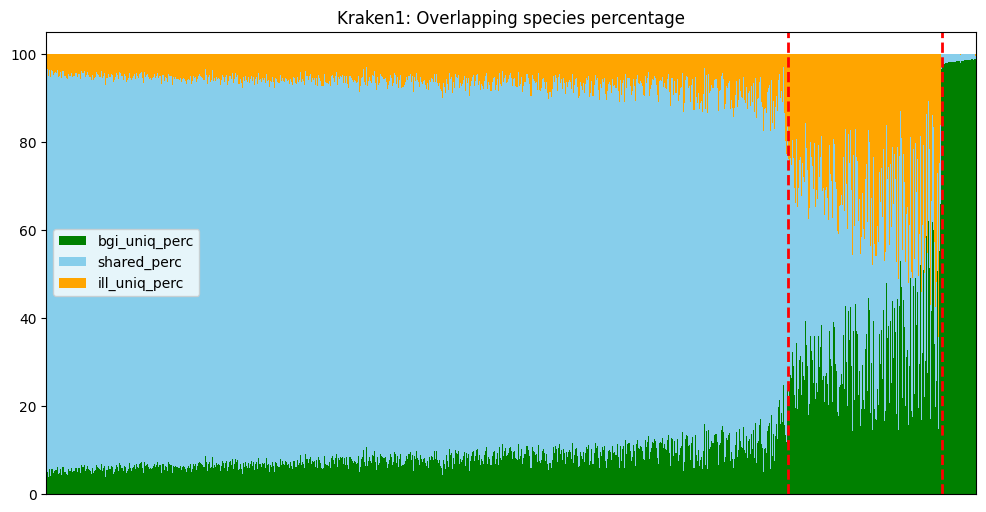

In [18]:
# Normalize the data
plt1 = Kraken1[['bgi_uniq_perc', 'shared_perc', 'ill_uniq_perc']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=1916, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1587, color='red', linestyle='--', linewidth=2)
plt.title('Kraken1: Overlapping species percentage')

plt.savefig('results2/Kraken1_overlap_perc.png', dpi=300)

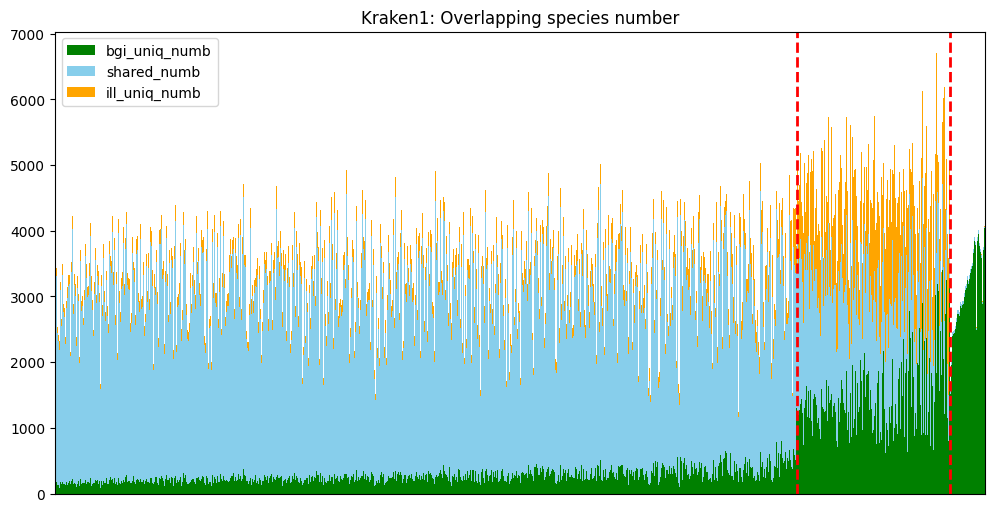

In [19]:
# Normalize the data
plt1 = Kraken1[['bgi_uniq_numb', 'shared_numb', 'ill_uniq_numb']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=1916, color='red', linestyle='--', linewidth=2)
plt.axvline(x=1587, color='red', linestyle='--', linewidth=2)
plt.title('Kraken1: Overlapping species number')

plt.savefig('results2/Kraken1_overlap_numb.png', dpi=300)

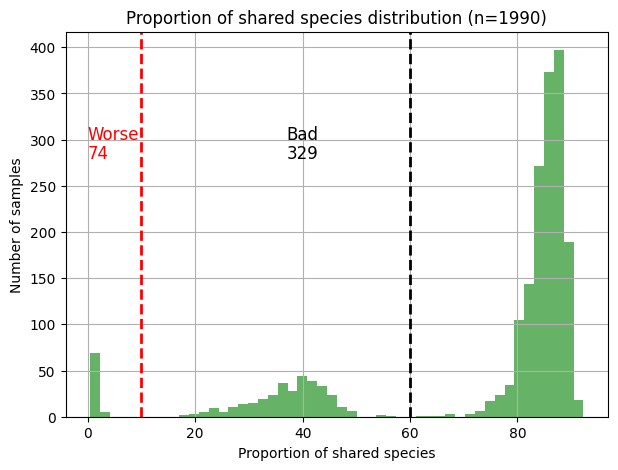

In [23]:
Kraken1['shared_perc'].hist(bins=50, figsize=(7,5), alpha=0.6, color='green')
plt.title('Proportion of shared species distribution (n=1990)')
plt.xlabel('Proportion of shared species')
plt.ylabel('Number of samples')

plt.axvline(x=10, color='red', linestyle='--', linewidth=2)
plt.axvline(x=60, color='black', linestyle='--', linewidth=2)

plt.text(-0.01, 300, 'Worse', fontsize=12, color='red')
plt.text(37, 300, 'Bad', fontsize=12, color='black')
plt.text(0.01, 280, '74', fontsize=12, color='red')
plt.text(37, 280, '329', fontsize=12, color='black')


plt.savefig('results2/Kraken1_shared_species_perc_distribution.png')

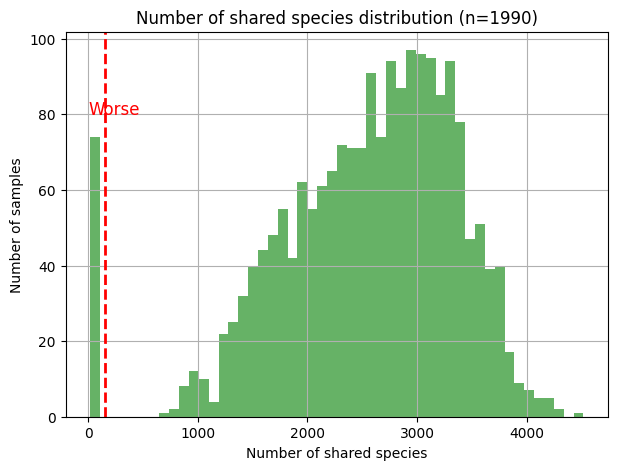

In [30]:
Kraken1['shared_numb'].hist(bins=50, figsize=(7,5), alpha=0.6, color='green')
plt.title('Number of shared species distribution (n=1990)')
plt.xlabel('Number of shared species')
plt.ylabel('Number of samples')

plt.axvline(x=150, color='red', linestyle='--', linewidth=2)
#plt.axvline(x=60, color='black', linestyle='--', linewidth=2)

plt.text(-0.01, 80, 'Worse', fontsize=12, color='red')
#plt.text(37, 300, 'Bad', fontsize=12, color='black')
#plt.text(0.01, 280, '74', fontsize=12, color='red')
#plt.text(37, 280, '329', fontsize=12, color='black')


plt.savefig('results2/Kraken1_shared_species_numb_distribution.png')

## Kraken2. Re-run WORSE sample group

In [31]:
one_drive_fld = '/Users/katerynapantiukh/OneDrive - Tartu Ülikool/2023_Illumina_vs_BGI'
bgi_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Cross-Platform_set/BGI_merged_output_all.csv')
ill2W_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Wrs_Bad_groups_check/Illumina2_Wrs_all.csv')
bgi_sp.head()

,name,bgi_VNN89Q,bgi_VNIDA4,bgi_V4O7YS,bgi_VPEB3X,bgi_VJ1AZM,bgi_VAEQ34,bgi_VR8E19,bgi_V2VJWP,bgi_VMJVUD,...,bgi_VFZ765,bgi_VI7GET,bgi_VYYIUL,bgi_VC7BF0,bgi_VNJOCX,bgi_V7H80T,bgi_VNFOKA,bgi_VF64R7,bgi_VBSSCF,bgi_VE0WMY
0,Phocaeicola plebeius_A,0.06195,0.00852,0.00243,0.00323,0.00008,0.00131,0.02083,0.00094,0.00778,...,0.00057,0.00004,0.09912,0.01204,0.00020,0.18792,0.00013,0.01353,0.11206,0.00005
1,Phocaeicola sp000432735,0.03978,0.00266,0.00012,0.00113,0.00004,0.00002,0.00048,0.00003,0.00012,...,0.00001,0.00002,0.00123,0.00003,0.00021,0.00247,0.00004,0.00033,0.00963,0.00003
2,Phocaeicola vulgatus,0.06197,0.00544,0.12579,0.00738,0.01992,0.00643,0.09425,0.03599,0.01691,...,0.00134,0.00079,0.01691,0.01340,0.01014,0.03527,0.03406,0.00071,0.02419,0.04035
3,Phocaeicola plebeius,0.02342,0.03354,0.00107,0.00058,0.00007,0.00046,0.12693,0.00020,0.00127,...,0.00016,0.00004,0.01349,0.00272,0.00025,0.04302,0.00006,0.00849,0.02463,0.00014
4,Phocaeicola dorei,0.01107,0.00074,0.02386,0.00125,0.01743,0.12284,0.01872,0.00359,0.00167,...,0.00386,0.00791,0.00264,0.00184,0.02161,0.00349,0.00323,0.00114,0.00233,0.07370


In [37]:
# Extract sample names from both DataFrames
sample_names_bgi = [col.split("_")[1] for col in bgi_sp.columns if col.startswith("bgi_")]
sample_names_ill = [col.split("_")[1] for col in ill2W_sp.columns if col.startswith("ill2_")]

# Find overlapping sample names
overlapping_samples = set(sample_names_bgi).intersection(sample_names_ill)

# Initialize lists to store results
bgi_uniq_list = []
shared_list = []
ill_uniq_list = []
sample_names_list = []

# Get the species names from the index of the first DataFrame
species_names = bgi_sp.index

# Iterate over each overlapping sample
for sample in overlapping_samples:
    
    columnB = 'bgi_'+sample
    columnI = 'ill2_'+sample
    bgi_sp_Smpl = bgi_sp[['name',columnB]]
    ill_sp_Smpl = ill2W_sp[['name',columnI]]
    # drop zero values
    bgi_sp_Smpl = bgi_sp_Smpl[bgi_sp[columnB] != 0]
    ill_sp_Smpl = ill_sp_Smpl[ill2W_sp[columnI] != 0]

    # select overlaping species
    ill_total = len(ill_sp_Smpl)
    bgi_total = len(bgi_sp_Smpl)

    overlap = len(bgi_sp_Smpl[bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])
    ill_unique = len(ill_sp_Smpl[~ill_sp_Smpl['name'].isin(bgi_sp_Smpl['name'])])
    bgi_unique = len(bgi_sp_Smpl[~bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])

    # append to the lists
    bgi_uniq_list.append(bgi_unique)
    shared_list.append(overlap)
    ill_uniq_list.append(ill_unique)
    sample_names_list.append(sample)

# Create a DataFrame from the lists
result_Kraken2_Wrs = pd.DataFrame({
    'bgi_uniq': bgi_uniq_list,
    'shared': shared_list,
    'ill_uniq': ill_uniq_list,
    'sample_name': sample_names_list
})

result_Kraken2_Wrs.head()


,bgi_uniq,shared,ill_uniq,sample_name
0,365,3270,318,VEDG1U
1,422,3418,208,VK62QE
2,358,3478,200,VQT0Y3
3,361,3202,250,VDT6S2
4,213,2979,215,VHIMG8


In [38]:
val = result_Kraken2_Wrs.drop(columns=['sample_name'])
result_Kraken2_Wrs_perc = val.div(val.sum(axis=1), axis=0) * 100
# merge result_Kraken1_perc to result_Kraken1
result_Kraken2_Wrs_perc = pd.concat([result_Kraken2_Wrs['sample_name'], result_Kraken2_Wrs_perc], axis=1)
Kraken2_Wrs = result_Kraken2_Wrs_perc.merge(result_Kraken2_Wrs, on='sample_name', suffixes=('_perc', '_numb'))
Kraken2_Wrs = Kraken2_Wrs.sort_values(by='shared_perc', ascending=False)
Kraken2_Wrs.head()

,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb
32,VLUM7Y,4.629367,90.627663,4.742971,163,3191,167
21,VR2KSA,5.083655,90.476190,4.440154,158,2812,138
42,VZ4EH6,5.595360,90.310474,4.094166,164,2647,120
13,VB930K,5.778070,90.019698,4.202232,176,2742,128
28,VRHMDV,6.560000,89.440000,4.000000,123,1677,75


In [39]:
# add non overlaping raws from Kraken1
non_overlaping = Kraken1[~Kraken1['sample_name'].isin(Kraken2_Wrs['sample_name'])]
Kraken2_Wrs = Kraken2_Wrs.append(non_overlaping, ignore_index=True)
Kraken2_Wrs

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_93811/513159834.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Kraken2_Wrs = Kraken2_Wrs.append(non_overlaping, ignore_index=True)


,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb
0,VLUM7Y,4.629367,90.627663,4.742971,163,3191,167
1,VR2KSA,5.083655,90.476190,4.440154,158,2812,138
2,VZ4EH6,5.595360,90.310474,4.094166,164,2647,120
3,VB930K,5.778070,90.019698,4.202232,176,2742,128
4,VRHMDV,6.560000,89.440000,4.000000,123,1677,75
...,...,...,...,...,...,...,...
1985,VFZ765,55.122180,19.901316,24.976504,2346,847,1063
1986,V25ZP5,22.116992,19.637883,58.245125,794,705,2091
1987,VONRWL,17.489390,19.343310,63.167300,783,866,2828
1988,VNIMGS,65.694613,18.124747,16.180640,3244,895,799


Text(0.5, 1.0, 'Kraken2: Overlapping species number')

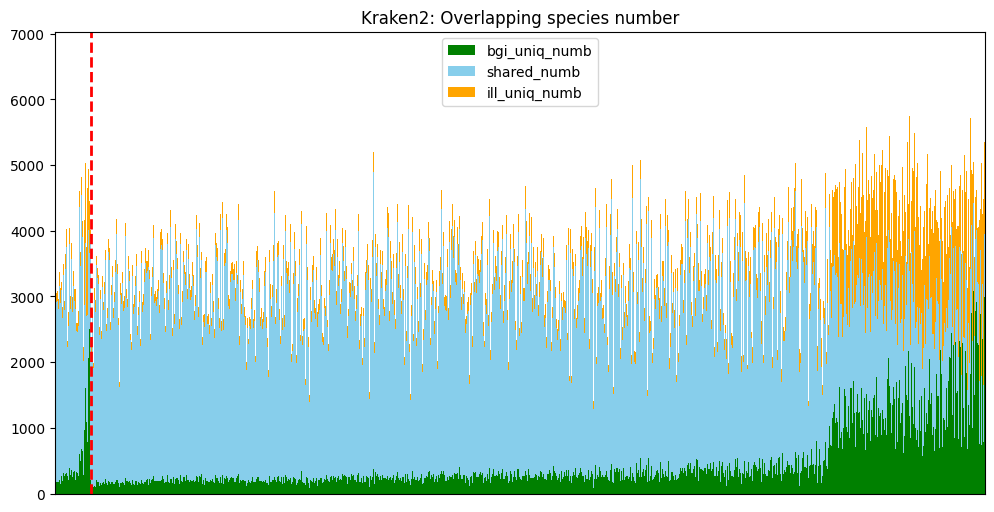

In [41]:
# Normalize the data
plt1 = Kraken2_Wrs[['bgi_uniq_numb', 'shared_numb', 'ill_uniq_numb']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=76, color='red', linestyle='--', linewidth=2)
plt.title('Kraken2: Overlapping species number')

#plt.savefig('results2/Kraken1_overlap_numb.png', dpi=300)

Text(0.5, 1.0, 'Kraken2: Overlapping species number')

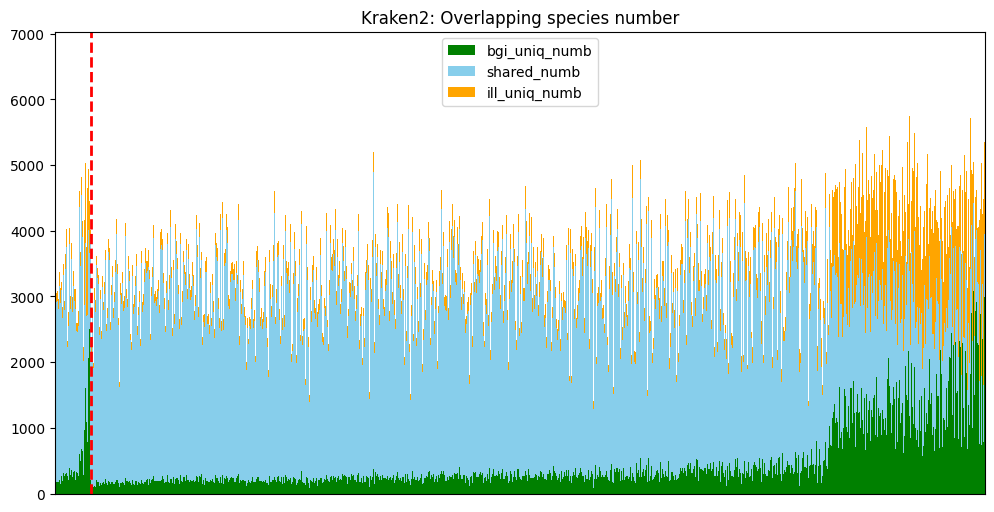

In [43]:
# Normalize the data
plt1 = Kraken2_Wrs[['bgi_uniq_numb', 'shared_numb', 'ill_uniq_numb']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=76, color='red', linestyle='--', linewidth=2)
plt.title('Kraken2: Overlapping species number')

## Kraken2. Re-run BAD sample group

In [45]:
one_drive_fld = '/Users/katerynapantiukh/OneDrive - Tartu Ülikool/2023_Illumina_vs_BGI'
bgi_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Cross-Platform_set/BGI_merged_output_all.csv')
ill2B_sp = pd.read_csv(str(one_drive_fld)+'/abud_results/Wrs_Bad_groups_check/Illumina2_Bad_all.csv')
bgi_sp.head()

,name,bgi_VNN89Q,bgi_VNIDA4,bgi_V4O7YS,bgi_VPEB3X,bgi_VJ1AZM,bgi_VAEQ34,bgi_VR8E19,bgi_V2VJWP,bgi_VMJVUD,...,bgi_VFZ765,bgi_VI7GET,bgi_VYYIUL,bgi_VC7BF0,bgi_VNJOCX,bgi_V7H80T,bgi_VNFOKA,bgi_VF64R7,bgi_VBSSCF,bgi_VE0WMY
0,Phocaeicola plebeius_A,0.06195,0.00852,0.00243,0.00323,0.00008,0.00131,0.02083,0.00094,0.00778,...,0.00057,0.00004,0.09912,0.01204,0.00020,0.18792,0.00013,0.01353,0.11206,0.00005
1,Phocaeicola sp000432735,0.03978,0.00266,0.00012,0.00113,0.00004,0.00002,0.00048,0.00003,0.00012,...,0.00001,0.00002,0.00123,0.00003,0.00021,0.00247,0.00004,0.00033,0.00963,0.00003
2,Phocaeicola vulgatus,0.06197,0.00544,0.12579,0.00738,0.01992,0.00643,0.09425,0.03599,0.01691,...,0.00134,0.00079,0.01691,0.01340,0.01014,0.03527,0.03406,0.00071,0.02419,0.04035
3,Phocaeicola plebeius,0.02342,0.03354,0.00107,0.00058,0.00007,0.00046,0.12693,0.00020,0.00127,...,0.00016,0.00004,0.01349,0.00272,0.00025,0.04302,0.00006,0.00849,0.02463,0.00014
4,Phocaeicola dorei,0.01107,0.00074,0.02386,0.00125,0.01743,0.12284,0.01872,0.00359,0.00167,...,0.00386,0.00791,0.00264,0.00184,0.02161,0.00349,0.00323,0.00114,0.00233,0.07370


In [46]:
# Extract sample names from both DataFrames
sample_names_bgi = [col.split("_")[1] for col in bgi_sp.columns if col.startswith("bgi_")]
sample_names_ill = [col.split("_")[1] for col in ill2B_sp.columns if col.startswith("ill2_")]

# Find overlapping sample names
overlapping_samples = set(sample_names_bgi).intersection(sample_names_ill)

# Initialize lists to store results
bgi_uniq_list = []
shared_list = []
ill_uniq_list = []
sample_names_list = []

# Get the species names from the index of the first DataFrame
species_names = bgi_sp.index

# Iterate over each overlapping sample
for sample in overlapping_samples:
    
    columnB = 'bgi_'+sample
    columnI = 'ill2_'+sample
    bgi_sp_Smpl = bgi_sp[['name',columnB]]
    ill_sp_Smpl = ill2B_sp[['name',columnI]]
    # drop zero values
    bgi_sp_Smpl = bgi_sp_Smpl[bgi_sp[columnB] != 0]
    ill_sp_Smpl = ill_sp_Smpl[ill2B_sp[columnI] != 0]

    # select overlaping species
    ill_total = len(ill_sp_Smpl)
    bgi_total = len(bgi_sp_Smpl)

    overlap = len(bgi_sp_Smpl[bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])
    ill_unique = len(ill_sp_Smpl[~ill_sp_Smpl['name'].isin(bgi_sp_Smpl['name'])])
    bgi_unique = len(bgi_sp_Smpl[~bgi_sp_Smpl['name'].isin(ill_sp_Smpl['name'])])

    # append to the lists
    bgi_uniq_list.append(bgi_unique)
    shared_list.append(overlap)
    ill_uniq_list.append(ill_unique)
    sample_names_list.append(sample)

# Create a DataFrame from the lists
result_Kraken2_Bad = pd.DataFrame({
    'bgi_uniq': bgi_uniq_list,
    'shared': shared_list,
    'ill_uniq': ill_uniq_list,
    'sample_name': sample_names_list
})

result_Kraken2_Bad.head()


,bgi_uniq,shared,ill_uniq,sample_name
0,1056,1458,1524,VOZVY6
1,973,1968,2127,VBGDV3
2,1620,1925,1244,VS9A0O
3,775,1601,1758,VMRQCT
4,2440,1616,924,VWZEWE


In [47]:
val = result_Kraken2_Bad.drop(columns=['sample_name'])
result_Kraken2_Bad_perc = val.div(val.sum(axis=1), axis=0) * 100
# merge result_Kraken1_perc to result_Kraken1
result_Kraken2_Bad_perc = pd.concat([result_Kraken2_Bad['sample_name'], result_Kraken2_Bad_perc], axis=1)
Kraken2_Bad = result_Kraken2_Bad_perc.merge(result_Kraken2_Bad, on='sample_name', suffixes=('_perc', '_numb'))
Kraken2_Bad = Kraken2_Bad.sort_values(by='shared_perc', ascending=False)
Kraken2_Bad.head()

,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb
312,VJEFJG,34.667373,55.817652,9.514975,1308,2106,359
81,VH3A20,20.791797,55.254913,23.953290,730,1940,841
141,V7OJZJ,24.090364,54.418233,21.491403,1205,2722,1075
123,V4OU5B,26.783280,50.590641,22.626079,1179,2227,996
8,VIBK6W,27.002584,50.107666,22.889750,1254,2327,1063


In [48]:
# add non overlaping raws from Kraken1
non_overlaping = Kraken2_Wrs[~Kraken2_Wrs['sample_name'].isin(Kraken2_Bad['sample_name'])]
Kraken2_Bad = Kraken2_Bad.append(non_overlaping, ignore_index=True)
Kraken2_Bad

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_93811/3938581396.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Kraken2_Bad = Kraken2_Bad.append(non_overlaping, ignore_index=True)


,sample_name,bgi_uniq_perc,shared_perc,ill_uniq_perc,bgi_uniq_numb,shared_numb,ill_uniq_numb
0,VJEFJG,34.667373,55.817652,9.514975,1308,2106,359
1,VH3A20,20.791797,55.254913,23.953290,730,1940,841
2,V7OJZJ,24.090364,54.418233,21.491403,1205,2722,1075
3,V4OU5B,26.783280,50.590641,22.626079,1179,2227,996
4,VIBK6W,27.002584,50.107666,22.889750,1254,2327,1063
...,...,...,...,...,...,...,...
1985,VYXJ7L,13.398013,66.828367,19.773620,580,2893,856
1986,V9E7KF,22.451670,66.783831,10.764499,1022,3040,490
1987,V8NC3I,11.729531,65.478381,22.792088,510,2847,991
1988,VY2X73,19.762739,63.278512,16.958749,733,2347,629


Text(0.5, 1.0, 'Kraken2: Overlapping species percentage')

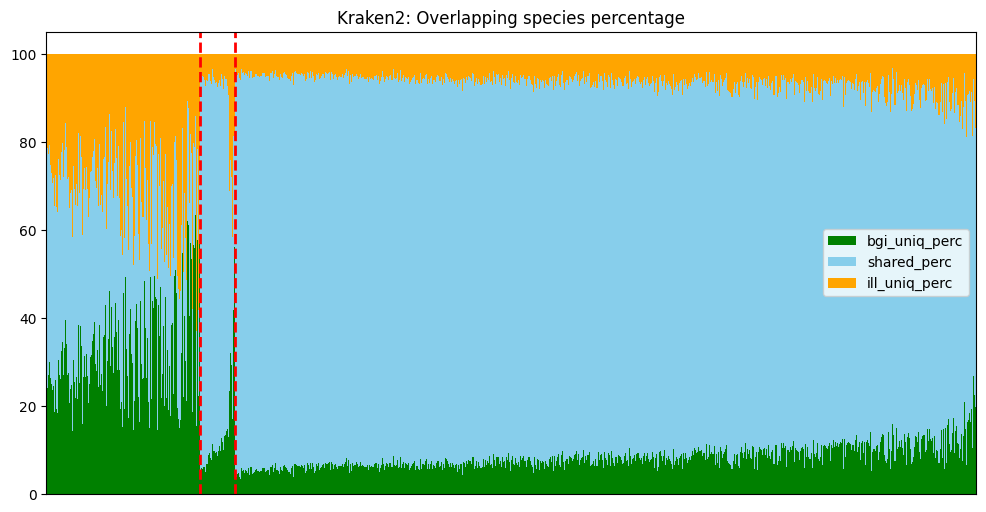

In [51]:
# Normalize the data
plt1 = Kraken2_Bad[['bgi_uniq_perc', 'shared_perc', 'ill_uniq_perc']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=329, color='red', linestyle='--', linewidth=2)
plt.axvline(x=403, color='red', linestyle='--', linewidth=2)
plt.title('Kraken2: Overlapping species percentage')

#plt.savefig('results2/Kraken1_overlap_numb.png', dpi=300)

Text(0.5, 1.0, 'Kraken2: Overlapping species number')

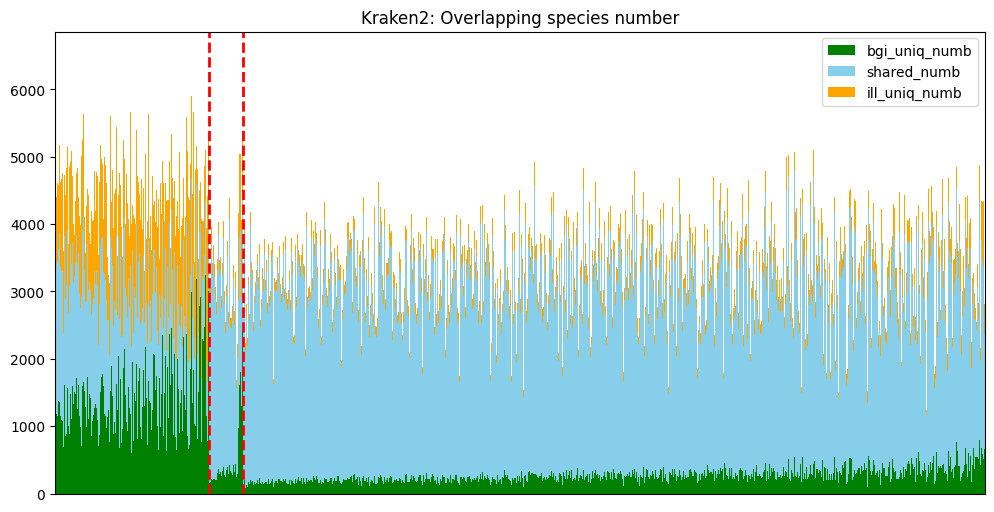

In [50]:
# Normalize the data
plt1 = Kraken2_Bad[['bgi_uniq_numb', 'shared_numb', 'ill_uniq_numb']]
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=329, color='red', linestyle='--', linewidth=2)
plt.axvline(x=403, color='red', linestyle='--', linewidth=2)
plt.title('Kraken2: Overlapping species number')

# FINAL plot

Text(0.5, 1.0, 'Kraken2: Overlapping species percentage')

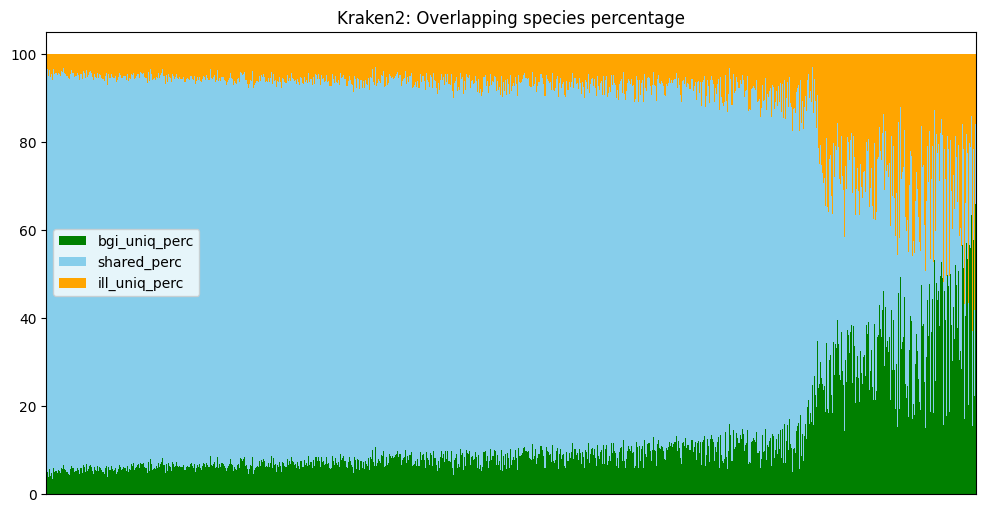

In [53]:
# Normalize the data
plt1 = Kraken2_Bad[['bgi_uniq_perc', 'shared_perc', 'ill_uniq_perc']]
plt1 = plt1.sort_values(by='shared_perc', ascending=False)
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])

plt.title('Kraken2: Overlapping species percentage')

Text(0, 0.5, 'shared_perc')

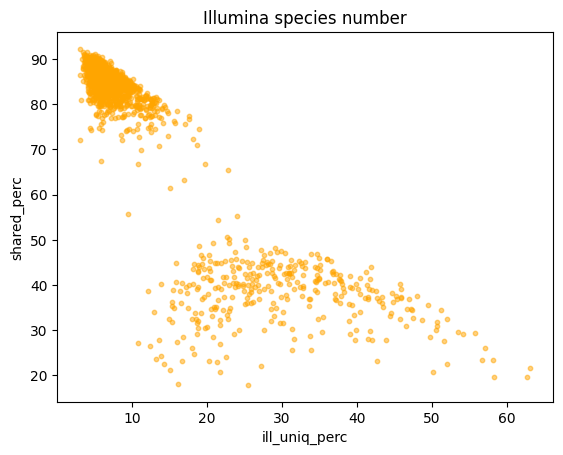

In [62]:
plt.scatter(Kraken2_Bad['ill_uniq_perc'], Kraken2_Bad['shared_perc'], color='orange', alpha=0.5, s=10)
plt.title('Illumina species number')
plt.xlabel('ill_uniq_perc')
plt.ylabel('shared_perc')
#plt.savefig('results/species_ill_all.png')

Text(0, 0.5, 'Shared species proportn')

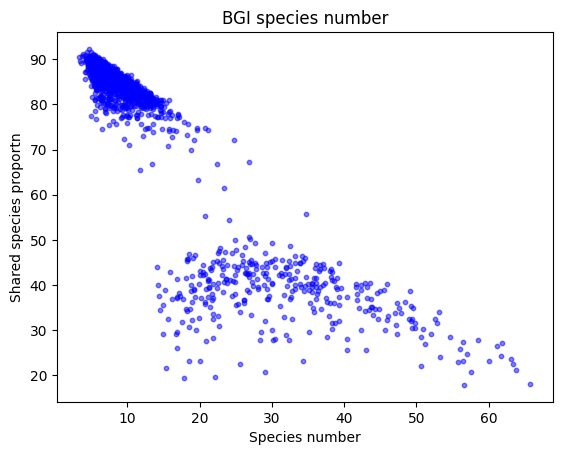

In [60]:
plt.scatter(Kraken2_Bad['bgi_uniq_perc'], Kraken2_Bad['shared_perc'], color='blue', alpha=0.5, s=10)
plt.title('BGI species number')
plt.xlabel('Species number')
plt.ylabel('Shared species proportn')

Text(0.5, 1.0, 'Kraken2: Overlapping species number')

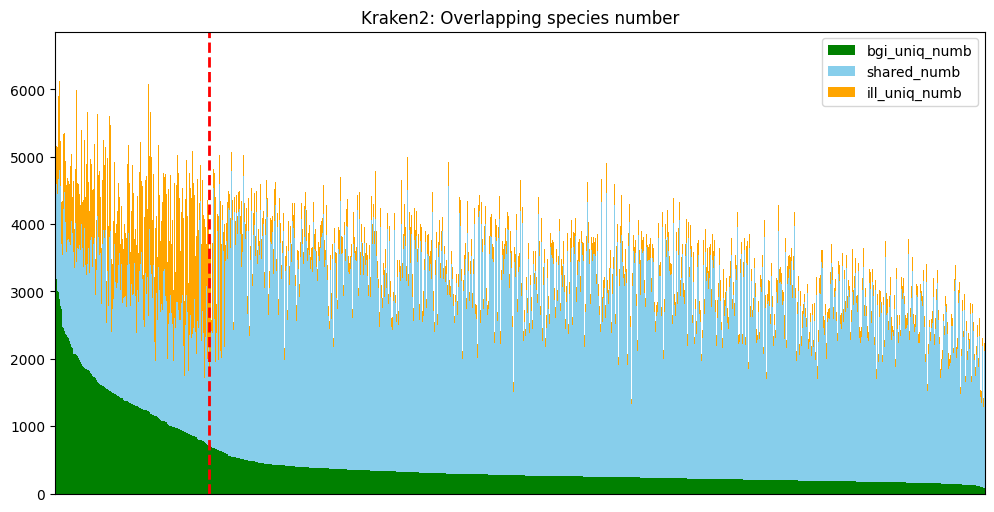

In [57]:
# Normalize the data
plt1 = Kraken2_Bad[['bgi_uniq_numb', 'shared_numb', 'ill_uniq_numb']]
plt1 = plt1.sort_values(by='bgi_uniq_numb', ascending=False)
plt1.plot(kind='bar', stacked=True, color=['green', 'skyblue', 'orange'], width=1, figsize=(12, 6))
plt.xticks([])
plt.axvline(x=329, color='red', linestyle='--', linewidth=2)
plt.title('Kraken2: Overlapping species number')

Text(0, 0.5, 'shared_numb')

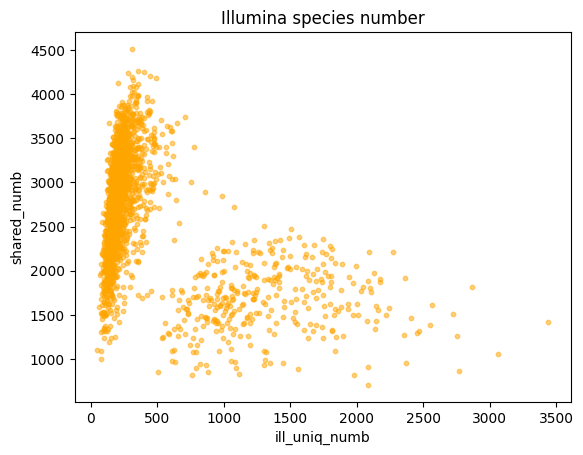

In [63]:
plt.scatter(Kraken2_Bad['ill_uniq_numb'], Kraken2_Bad['shared_numb'], color='orange', alpha=0.5, s=10)
plt.title('Illumina species number')
plt.xlabel('ill_uniq_numb')
plt.ylabel('shared_numb')

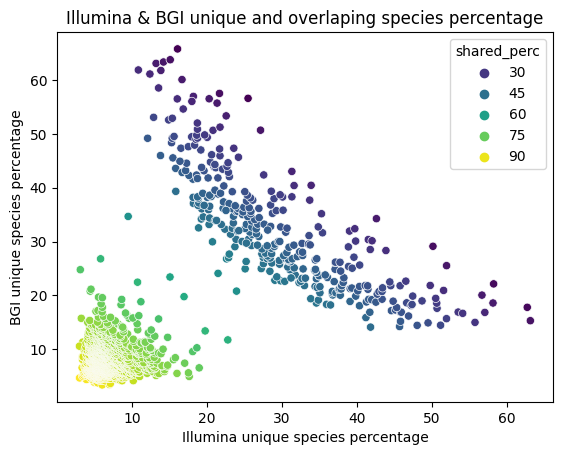

In [68]:
sns.scatterplot(data=Kraken2_Bad, x='ill_uniq_perc', y='bgi_uniq_perc', hue='shared_perc', palette='viridis')
plt.title('Illumina & BGI unique and overlaping species percentage')
plt.xlabel('Illumina unique species percentage')
plt.ylabel('BGI unique species percentage')
plt.savefig('results2/Illumina_BGI_species_perc.png')

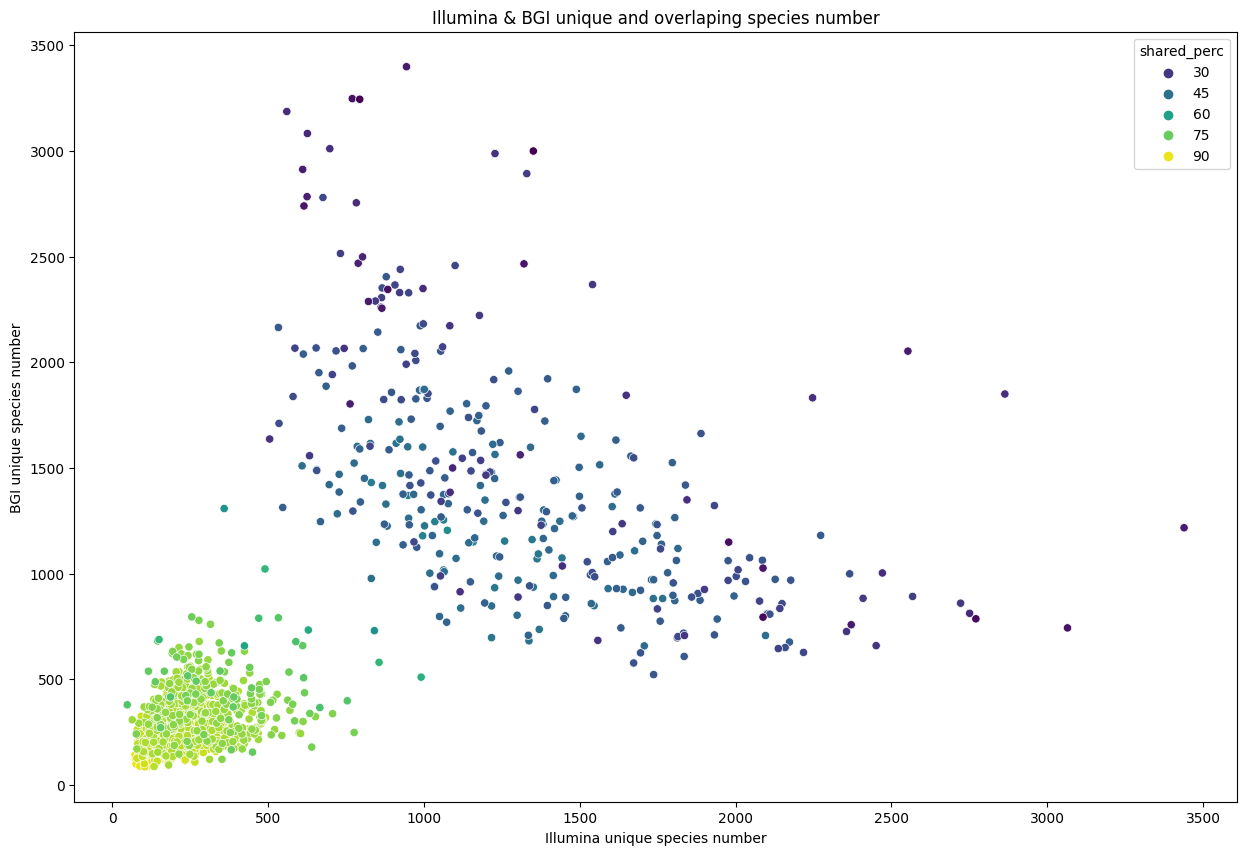

In [71]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=Kraken2_Bad, x='ill_uniq_numb', y='bgi_uniq_numb', hue='shared_perc', palette='viridis')
plt.title('Illumina & BGI unique and overlaping species number')
plt.xlabel('Illumina unique species number')
plt.ylabel('BGI unique species number')
plt.savefig('results2/Illumina_BGI_species_numb.png')

Text(0, 0.5, 'Number of samples')

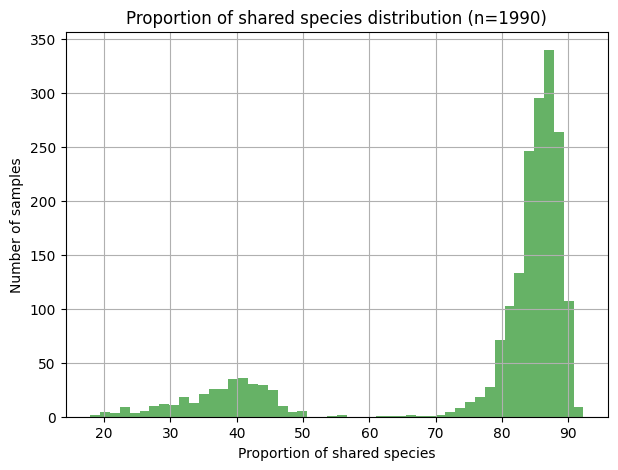

In [70]:
Kraken2_Bad['shared_perc'].hist(bins=50, figsize=(7,5), alpha=0.6, color='green')
plt.title('Proportion of shared species distribution (n=1990)')
plt.xlabel('Proportion of shared species')
plt.ylabel('Number of samples')